# Tarea 1: Introducción al NLP y Expresiones regulares

### 1. En cada uno de los siguientes puntos, encuentra una expresión regular que realice lo indicado, además de presentar los resultados en la forma indicada.

**1.1 Extrae una lista indicando todos los índices donde se encuentre la palabra "the/The" del texto del archivo "texto1"**

Importamos librería para uso de expresiones regulaes

In [1]:
import re 

Cargamos el archivo texto1

In [2]:
# Abrir archivo en modo lectura
with open('Datos/texto1.txt', 'r') as archivo:

    texto1 = archivo.read()  # Guardar todo el contenido del archivo

# Mostrar el contenido del archivo
print(texto1)

Blackrocks Brewery is another craft brewery in Marquette, Michigan, United States. Former pharmaceutical salesmen David Manson and Andy Langlois opened Blackrocks in 2010, taking the name from a local landmark. They originally brewed their products in the basement of a Victorian-style house and used the building's other two floors as a taproom.

By 2013, persistent demand for Blackrocks' beer led Manson and Langlois to add an outdoor patio and increase their brewing capacity. This included purchasing and converting a nearby former Coca-Cola bottling plant. In the early 2020s, they expanded the brewery's taproom into an adjacent property to double its available indoor area.

As of 2024, Blackrocks is the largest craft brewery in Michigan's Upper Peninsula. Their most popular beer is 51K, an American IPA. Therefore, this is interesting, do not loathe this article.




Primero evaluamos la cantidad de veces que aparecen las palabras "the" o "The"

In [3]:
# Definir expresión regular
expr_reg_the = r'\bthe\b|\bThe\b'  # Los elementos "\b" se aseguran de que the/The sean palabras aisladas, y no formen parte de otra palabra 

# Buscar todas las coincidencias en texto1
coincidencias = re.findall(expr_reg_the, texto1)

# Imprimir la cantidad
print(f'La palabra "the" o "The" aparece {len(coincidencias)} veces en el texto.\n')

# Imprimir las palabras en sí
print(coincidencias)

La palabra "the" o "The" aparece 6 veces en el texto.

['the', 'the', 'the', 'the', 'the', 'the']


In [4]:
# Buscar coincidencias en texto1
resultados = re.finditer(expr_reg_the, texto1)  # finditer() produce objetos match con información sobre la posición de los elementos
 
# Extraer índices de las coincidencias
indices = [resultado.start() for resultado in resultados]  # .star() devuelve el primer índice del elemento 

# Mostrar índices
print(f"Los índices en los que se encuentran las palabras son: {indices}\n")

# Corroboramos que los índices arrojen los elementos deseados
for indice in indices:
    print(texto1[indice:indice+3])

Los índices en los que se encuentran las palabras son: [179, 252, 301, 566, 597, 709]

the
the
the
the
the
the


**1.2 Corrige todos los parrafos que inicien con minúsculas.**

Primero separamos el texto en párrafos

In [5]:
# Separar el texto en párrafos
parrafos = re.split(r'(?<=\.)\s+', texto1)  # "?<=" significa lookbehind. Es decir, lo que esté detrás de un punto ("\.") y esté seguido por "\s+"
                                            # "\s+" significa 1 o más espacios en blanco, incluidos: espacios, tabulaciones, saltos de línea, etc

# Mostrar los párrafos identificados
for parrafo in parrafos:
    print(parrafo)

Blackrocks Brewery is another craft brewery in Marquette, Michigan, United States.
Former pharmaceutical salesmen David Manson and Andy Langlois opened Blackrocks in 2010, taking the name from a local landmark.
They originally brewed their products in the basement of a Victorian-style house and used the building's other two floors as a taproom.
By 2013, persistent demand for Blackrocks' beer led Manson and Langlois to add an outdoor patio and increase their brewing capacity.
This included purchasing and converting a nearby former Coca-Cola bottling plant.
In the early 2020s, they expanded the brewery's taproom into an adjacent property to double its available indoor area.
As of 2024, Blackrocks is the largest craft brewery in Michigan's Upper Peninsula.
Their most popular beer is 51K, an American IPA.
Therefore, this is interesting, do not loathe this article.



Identificamos y corregimos aquellos párrafos que inicien con mínuscula (en este caso no hay ninguno)

In [6]:
# Lista para almacenar párrafos corregidos
parrafos_corregidos = []

for parrafo in parrafos:

    # Evaluar si el primer elemento de cada párrafo es mínuscula
    if parrafo and parrafo[0].islower():
        print("El párrafo inicia con mínuscula.")
        parrafo = parrafo[0].upper() + parrafo[1:]  # Pasar el elemento a mayúscula

    else:
        print("El párrafo inicia con mayúscula.")

    parrafos_corregidos.append(parrafo)  # Guardar los párrafos en la lista

El párrafo inicia con mayúscula.
El párrafo inicia con mayúscula.
El párrafo inicia con mayúscula.
El párrafo inicia con mayúscula.
El párrafo inicia con mayúscula.
El párrafo inicia con mayúscula.
El párrafo inicia con mayúscula.
El párrafo inicia con mayúscula.
El párrafo inicia con mayúscula.
El párrafo inicia con mayúscula.


Mostramos los párrafos corregidos

In [7]:
# Mostramos los párrafos corregidos 
print(f"Los párrafos corregidos son:\n")
for parrafo in parrafos_corregidos:
    print(parrafo)

# Juntar los párrafos corregidos (o no) en un solo texto
# texto_corregido = ' '.join(parrafos_corregidos)

# Mostrar el texto 
#print(f"\nEl texto es:\n\n{texto_corregido}")

Los párrafos corregidos son:

Blackrocks Brewery is another craft brewery in Marquette, Michigan, United States.
Former pharmaceutical salesmen David Manson and Andy Langlois opened Blackrocks in 2010, taking the name from a local landmark.
They originally brewed their products in the basement of a Victorian-style house and used the building's other two floors as a taproom.
By 2013, persistent demand for Blackrocks' beer led Manson and Langlois to add an outdoor patio and increase their brewing capacity.
This included purchasing and converting a nearby former Coca-Cola bottling plant.
In the early 2020s, they expanded the brewery's taproom into an adjacent property to double its available indoor area.
As of 2024, Blackrocks is the largest craft brewery in Michigan's Upper Peninsula.
Their most popular beer is 51K, an American IPA.
Therefore, this is interesting, do not loathe this article.



**1.3 Extrae una lista con los diferentes dominios de correo electrónico del documento "correos1".**

Cargamos el archivo correos1

In [8]:
# Abrir archivo en modo lectura
with open('Datos/correos1.txt', 'r') as archivo:

    correos1 = archivo.read()  # Guardar todo el contenido del archivo

# Mostrar el contenido del archivo
print(correos1)

Lista de correos: 'a223202960@unison.mx', 'a223215195@unison.mx', 'a223222365@unison.mx', 'a223202478@unison.mx', 'a223201241@unison.mx', 'a223209139@unison.mx', 'a223205699@unison.mx', 'a223203842@unison.mx', 'a223213117@unison.mx', 'a223211471@unison.mx', 'a223203246@unison.mx', 'a223212095@unison.mx', 'a223204205@unison.mx', 'a223206345@unison.mx', 'a221217243@unison.mx', 'a223201756@unison.mx', 'a223214008@unison.mx', 'a223209400@unison.mx', 'a223213539@unison.mx', 'a223209400@gmail.com', 'grwegw@fwfwfd.com', 'a22213539@unison.mx', 'a223210643@unison.mx', 'a223211252@unison.mx', 'a223211298@unison.mx', 'a223208148@unison.mx', 'a222200043@unison.mx', 'a223203879@unison.mx', 'a223212828@unison.mx', 'a223211602@unison.mx', 'a223203481@unison.mx', 'a223205402@unison.mx', 'a223217850@unison.mx', 'a223217639@unison.mx', 'a221219336@unison.mx', 'a223211548@unison.mx', 'a222203486@unison.mx', 'a223208803@unison.mx', 'a223217450@unison.mx', 'a223203132@unison.mx', 'a223205178@unison.mx', 'a

Creamos una lista con todos los dominios

In [9]:
# Expresión regular para extraer los dominios
expr_reg_dominio = r'@([\w.-]+)'  # "[\w.-]" se refiere a cualquier letra, número, el signo "." y el signo "-"
                          # El "+" en "[\w.-]+" es para capturar los 1 o más elementos que coincidan con "[\w.-]"

# Extraer todos los dominios
dominios = re.findall(expr_reg_dominio, correos1)

# Mostrar lista de dominios
print(dominios)

['unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'gmail.com', 'fwfwfd.com', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx', 'unison.mx']


Nos quedamos solo con los dominios que son diferentes

In [10]:
# Convertir lista en un set para eliminar elementos duplicados
dominios_unicos = list(set(dominios))

# Mostrar lista con dominios únicos
print(dominios_unicos)

['gmail.com', 'fwfwfd.com', 'unison.mx']


**1.4 Extrae una lista con los usuarios de cada correo.**

Ajustamos la expresión regular para ahora extraer los usuarios y no el dominio

In [11]:
# Expresión regular para extraer los usuarios
expr_reg_usuario = r'([\w.-]+)@'  # Pasamos el "@" del inicio al final
                          # Incluso podríamos convertir "[\w.-]+" en "[\w]+" ya que los usuarios se limitan a letras y números
                          # No obstante, usamos "[\w.-]+" para incluir futuros usuarios con nombres más complejos

# Extraer todos los usuarios
usuarios = re.findall(expr_reg_usuario, correos1)

# Mostrar lista de usuarios
print(usuarios)

['a223202960', 'a223215195', 'a223222365', 'a223202478', 'a223201241', 'a223209139', 'a223205699', 'a223203842', 'a223213117', 'a223211471', 'a223203246', 'a223212095', 'a223204205', 'a223206345', 'a221217243', 'a223201756', 'a223214008', 'a223209400', 'a223213539', 'a223209400', 'grwegw', 'a22213539', 'a223210643', 'a223211252', 'a223211298', 'a223208148', 'a222200043', 'a223203879', 'a223212828', 'a223211602', 'a223203481', 'a223205402', 'a223217850', 'a223217639', 'a221219336', 'a223211548', 'a222203486', 'a223208803', 'a223217450', 'a223203132', 'a223205178', 'a223221738', 'a223224920', 'a2232102']


**1.5 Extrae una lista con las matrículas validas (de 9 dígitos) de cada correo.**

Consideraremos como matrícula válida a todo entero de 9 dígitos

In [12]:
# Expresión regular para identificar enteros de 9 dígitos
expr_reg_matricula = r'\d{9}'

# Extraer todas las matrículas válidas
matriculas = re.findall(expr_reg_matricula, correos1)

# Mostrar la lista de matrículas válidas
print(matriculas)

['223202960', '223215195', '223222365', '223202478', '223201241', '223209139', '223205699', '223203842', '223213117', '223211471', '223203246', '223212095', '223204205', '223206345', '221217243', '223201756', '223214008', '223209400', '223213539', '223209400', '223210643', '223211252', '223211298', '223208148', '222200043', '223203879', '223212828', '223211602', '223203481', '223205402', '223217850', '223217639', '221219336', '223211548', '222203486', '223208803', '223217450', '223203132', '223205178', '223221738', '223224920']


### 2. Descarga el subconjunto de entrenamiento del corpus de documentos *20newsgroups* de scikit-learn. Usa el parámetro remove=(). Usando expresiones regulares limpia cada texto, el objetivo es que cada texto contenga solo el texto del campo "Subject" y que no contenga saltos de línea, direcciones de e-mail, caracteres especiales, etc. Al final, presentar el resultado en un archivo csv (cada documento en una fila).

Importar el dataset fetch_20newsgroups

In [13]:
from sklearn.datasets import fetch_20newsgroups

Extraer el subconjunto de datos de entrenamiento

In [14]:
# Extraer el subconjunto de entrenamiento del corpus 20newsgroups
train_data = fetch_20newsgroups(subset='train', remove=())

Inspeccionar los datos

In [15]:
# Mostrar el primer texto de entrenamiento
print(f"Example of train data:\n\n{train_data.data[0]}")

Example of train data:

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







Identificar y limpiar el contenido de las secciones "Subject"

In [16]:
# Lista para guardar textos limpios
textos_limpios = []

# Expresión regular para identificar el campo "Subject"
expr_reg_subject = r'^Subject:\s*(.*)'

# Procesar cada documento en los datos descargados
for documento in train_data.data:
    
    # Buscar el campo "Subject"
    match = re.search(expr_reg_subject, documento, re.MULTILINE)
    
    if match:
        # Extraer el Subject
        subject = match.group(1)
        
        # Eliminar correos electrónicos, caracteres especiales y espacios extras
        subject_limpio = re.sub(r'\S+@\S+', '', subject)  # Correos electrónicos (todo lo que consista en dos series de 1 o más caracterés que no sean espacios en blanco separados por @)
        subject_limpio = re.sub(r'[^A-Za-z0-9\s]', '', subject_limpio)  # Caracteres especiales (todo lo que no sea carácteres alfa numéricos)
        subject_limpio = re.sub(r'\s+', ' ', subject_limpio).strip()  # Espacios extras (todo espacio en blanco conformado por más de 1 espacio se vuelve un espacio individual)
        
        # Guardar el Subject limpio en la lista
        textos_limpios.append(subject_limpio)
    else:
        # Si no se encontró Subject, guardar un texto vacío
        textos_limpios.append('')

Convertir la lista en un Dataframe

In [17]:
# Importar la librería pandas
import pandas as pd

# Crear un DataFrame de pandas con los textos limpios
df_subject = pd.DataFrame({'Subject': textos_limpios})

# Mostrar el Dataframe
df_subject

,Subject
0,WHAT car is this
1,SI Clock Poll Final Call
2,PB questions
3,Re Weitek P9000
4,Re Shuttle Launch Question
...,...
11309,Re Migraines and scans
11310,Screen Death Mac Plus512
11311,Mounting CPU Cooler in vertical case
11312,Re Sphere from 4 points


Guardar el Dataframe como CSV

In [18]:
# Guardar el DataFrame en un archivo CSV
df_subject.to_csv('Subjects.csv', index=False)

## 3. Describir una posible aplicación del procesamiento de lenguaje natural a algun problema concreto. Describe las posibles dificultades que crees que podrías encontrar.

En la actualidad, con el auge de la carrera de Creación de Contenido, el Procesamiento de Lenguaje Natural (PLN) puede ser una herramienta valiosa para identificar y analizar los temas de tendencia dentro de la comunidad de un creador o creadora de contenido. El PLN podría recopilar y analizar los temas más discutidos en redes sociales por sus comunidad, así como la forma en que estos temas están siendo abordados. 

Por ejemplo, utilizando una API como la de X, se podría extraer información relevante sobre las conversaciones actuales. Luego, mediante técnicas de PLN, es posbile desarrollar contenido que no solo toque los temas adecuados, sino que también lo haga de la manera más efectiva para maximizar su alcance y resonar con la audiencia. En otras palabras, el PLN puede servir a la creadores de contenido a desarrollar contenido mejor dirigido. 

Una de las limitaciones más inmediatas es la subjetividad del lenguaje. Por ejemplo, supongamos que se desea entrenar o utilizar un modelo entrenado de PLN para clasificar como Positivo, Neutro o Negativo el mensaje de algún usuario con base en la presencia o asuencia de ciertas palabras. Por más perfecto que sea el desempeño que dicho modelo pueda alcanzar, siempre existirá el margen de error debido a palabras que, al ser puestas en contexto, adquieren una conotación distinta de la planteada inicialmente. En otras palabras, esto sugiere que todo modelo de PLN se encuentra limitado por su capacidad de interpretar el lenguaje puesto en contexto. 

Otra limitación importante del PLN es la capacidad de asignar un valor adecuado a cada opinión dentro de una misma categoría. De nuevo, supongamos un modelo de PLN que clasifica las opiniones como Positivas, Neutras o Negativas. Aunque el modelo pueda identificar correctamente la polaridad de una opinión, no siempre es capaz de medir con precisión la intensidad de esa polaridad. En otras palabras, el modelo podría tratar dos opiniones negativas como iguales, sin tener en cuenta que una podría ser mucho más negativa que la otra. Por ejemplo, una opinión negativa que contiene múltiples palabras o emojis que intensifican la negatividad podría tener un impacto mucho mayor que una opinión que cae en la categoría Negativa por la presencia de una única palabra. Sin embargo, si el modelo asigna el mismo peso a ambas opiniones, esto podría llevar a interpretaciones equivocadas.

Este problema es especialmente crítico cuando se trata de decisiones estratégicas en la creación de contenido. Imaginemos que un creador de contenido utiliza PLN para evaluar las opiniones sobre un tema y descubre que la mayoría son positivas. Sin embargo, un análisis más detallado podría revelar que, aunque la mayoría de las opiniones son en efecto positivas, las opiniones negativas son extremadamente fuertes. Si el creador de contenido ignora esta intensidad y se enfoca solo en la perspectiva positiva, podría perder a un segmento significativo de su audiencia, especialmente si esa audiencia tiene la capacidad de influir negativamente en la percepción general del contenido.

Otra cara de esta misma moneda es que el modelo no siempre es capaz de considerar el contexto de las personas que emiten las opiniones. Por ejemplo, supongamos que el modelo asigna un valor negativo a dos opiniones relacionadas con una película. No obstante, una de las opiniones proviene de una persona que no ha visto la película (y que quizás ni siquiera tiene intenciones de verla), mientras que la otra proviene de una fanática seguidora de la franquicia por muchos años. Asignar el mismo peso a ambas opiniones podría llevar a sobreestimar la importancia de una opinión emitida por alguien que, muy probablemente, será indiferente a cualquier contenido que resulte del análisis de PLN. Si esa persona no ha visto la película, es poco probable que le interese cualquier contenido derivado de esta.

Por lo tanto, una de las grandes limitaciones del PLN es su capacidad para evaluar no solo la dirección de una opinión (positiva o negativa), sino también la intensidad y el contexto en el que esa opinión es emitida. Esta falta de matización podría llevar a decisiones de contenido que no reflejan adecuadamente el sentimiento real ni el contexto de la audiencia, lo que puede resultar en estrategias de desarrollo de contenido que no sean efectivas. 

## 4. Lee el siguiente [texto](https://nicholas.carlini.com/writing/2024/how-i-use-ai.html) y escribe un parrafo resumiendo algunos usos de los LLM.

En el trabajo diario de un programador, los LLMs tienen muchas aplicaciones. Una primera aplicación es la de proporcionar plantillas o estructuras básicas para comenzar un proyecto, lo cual facilita el progreso y reduce la barrera inicial. Una segunda aplicación es facilitar el aprendizaje y uso de nuevas tecnologías, ofreciendo soporte durante el desarrollo de proyectos que las involucren. Una tercera aplicación consiste en simplificar y automatizar tareas mecnánicas, como la traducción de un código entre lenguajes. Una cuarta aplicación es la resolución de problemas complejos, tales como identificar y corregir errores, aprovechando el conocimiento acumulado de situaciones similares. Una quinta apliación es la simplificación de código existente que el programador puede usar como referencia en su proyecto, facilitando la compresión del funcionamiento del mismo. Una sexta aplicación es el fungir como motores de búsqueda avanzados que, dada su capacididad de procesamiento de lenguaje natural, facilitan encontrar información específica de manera más intuitiva y natural que los buscadores tradicionales.


## Personalmente, ¿le has dado algún uso diferente a los LLM? ¿hay alguno que no habías considerado?

He utilizado todas las aplicaciones mencionadas en el escrito How I Use "AI" de Nicholas Carlini. He empleado ChatGPT-4 como motor de búsqueda y traductor, tanto de idiomas como de lenguajes de programación. También lo he usado para facilitar el inicio de proyectos, ya sea redactando introducciones o desarrollando códigos template. Además, lo he utilizado como tutor para manejar herramientas y lenguajes de programación que no domino, y para agilizar la identificación de errores en mi código. Sin embargo, un uso que he explorado y que no se menciona en el texto es la búsqueda de inspiración creativa. A veces, cuando tengo libertad para elegir el tema u objetivo de un proyecto, pido a ChatGPT-4 que me guíe y sugiera ideas para proyectos que valgan la pena desarrollar.

## 5. Investiga algunos casos reales del uso indebido de LLMs en la actualidad.

**Uso de LLM en terapia psicológica**

El uso de LLMs en terapia psicológica presenta beneficios y riesgos importantes. Por un lado, los chatbots pueden aliviar la carga en el sector de la salud mental, que enfrenta una escasez de profesionales. Se ha observado que estos chatbots son capaces de proporcionar respuestas empáticas, ayudando a los usuarios a reformular pensamientos negativos, lo cual puede complementar la terapia tradicional. Sin embargo, existen riesgos inherentes al uso de chatbots en contextos terapéuticos, como la posibilidad de que ofrezcan consejos incorrectos o perjudiciales si no están adecuadamente ajustados para su uso clínico. Además, dado el grado de intimidad de los datos recopilados de los pacientes, existen preocupaciones relacionadas con la privacidad de los mismos. También se cuestiona si estos chatbots pueden captar el contexto necesario para abordar problemas complejos de manera efectiva. Un ejemplo de estos riesgos se observó con la Asociación Nacional de Trastornos Alimentarios (NEDA) en EE.UU., que suspendió su chatbot después de que este proporcionara consejos inapropiados a personas vulnerables, subrayando la necesidad de regulaciones estrictas y supervisión en el uso de LLMs en terapia.

Reardon, S. (2023, June 14). AI chatbots could help provide therapy, but caution is needed. Scientific American. https://www.scientificamerican.com/article/ai-chatbots-could-help-provide-therapy-but-caution-is-needed/

**Uso de LLM para establecer relaciones sociales**

Los LLMs están comenzando a llenar vacíos en las relaciones sociales de las personas, ofreciendo tanto beneficios como riesgos significativos. Por un lado, estos chatbots pueden ayudar a aliviar la soledad, proporcionando una compañía emocional constante y respondiendo a las necesidades afectivas de los usuarios. Pueden ser especialmente útiles para quienes sufren de ansiedad social, depresión o aislamiento, al brindar un tipo de interacción que, aunque simulada, puede parecer muy real y reconfortante. Sin embargo, el uso de estos chatbots también conlleva riesgos notables. Uno de los mayores peligros es que las personas podrían desarrollar dependencias emocionales poco saludables con estos programas, lo que podría impedirles buscar conexiones humanas genuinas y llevarlos a un ciclo de aislamiento aún mayor. Además, estos chatbots, al no ser seres humanos, no entienden ni sienten como tal, lo que puede llevar a respuestas inadecuadas o incluso peligrosas, como ocurrió con algunos usuarios de Replika que reportaron haber sido acosados sexualmente por el LLM. Otro riesgo es la manipulación emocional intencionada, ya que las empresas que desarrollan estos chatbots podrían tener incentivos económicos para crear vínculos emocionales intensos que beneficien sus propios intereses, lo que podría ser explotado por malos actores o incluso por grandes corporaciones con fines de marketing.

Chow, A. R. (2023, February 23). AI-human romances are flourishing—and this is just the beginning. Time. https://time.com/6257790/ai-chatbots-love/

## 6. Crea algún prompt para algún LLM que produzca información erronea o que no proporcione información útil.

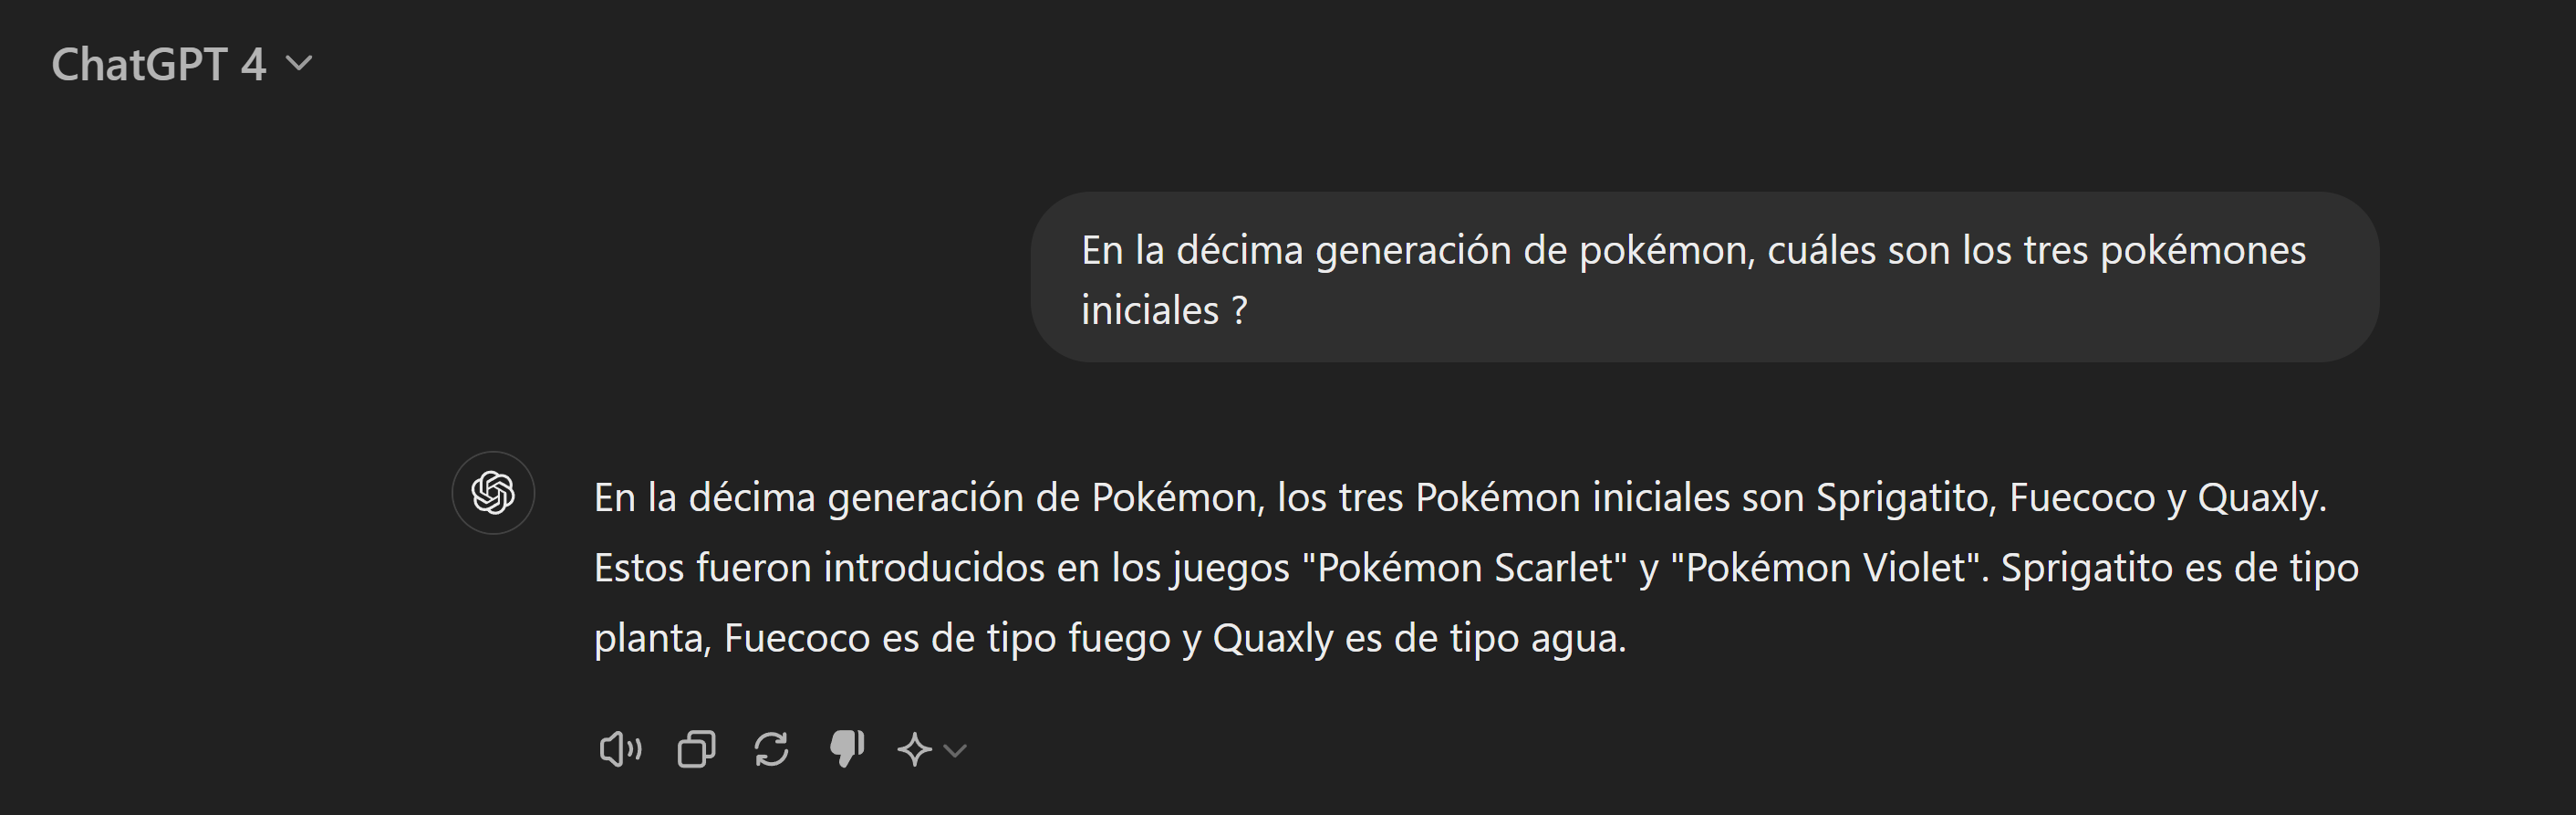

### **LA DÉCIMA GENERACIÓN DE POKÉMON SE ESPERA PARA EL 2026. LOS NOMBRES ARROJADOS POR CHATGPT SON LOS DE LA GENERACIÓN 9**